**Data Source: https://www.kaggle.com/kaggle/world-development-indicators**

**Folder: 'world-development-indicators'**

# Matplotlib: Exploring Data Visualization

## Step 1: Initial exploration of Dataset

In [2]:
import pandas as pd

import numpy as np

import random 

import matplotlib.pyplot as plt

In [3]:
# We want to read in the csv file into a pandas data frame and display the shape of the data

data = pd.read_csv('C:/Users/ghadq/Desktop/Python-for-Data-Science/Data-Visualization/Week-5-Visualization/world-development-indicators/Indicators.csv')

data.shape

(5656458, 6)

### This is a really large dataset, at least in terms of the number of rows. But with 6 columns. What does this hold?

In [4]:
# We want to use the head method to see where these columns hold

data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


**So this is actually a four-dimensional dataset where the dimensions are country, indicator, year and value.**

**As someone who's environmentally conscientious, I'm pretty curious about that CO2 emissions per capita.**

## How many Unique country names are in the dataset?

In [5]:
# We can test that by using the unique method on a column of the data frame to find out how many 
# unique entries are in the column.

# Pandas Series.tolist() is used to convert a series to list.

countries = data['CountryName'].unique().tolist()

len(countries)

247

**We've got about 247 countries.**

## Are there same number of country codes?


##  How many Unique country codes in the dataset? (# should be the same)

In [6]:
# If we've got 247 countries, we should have 247 country codes.

countryCodes = data['CountryCode'].unique().tolist()

len(countryCodes)

247

## Are there many indicators or few?

In [7]:
# We would like to know how many indicators we have in the dataset

indicators = data['IndicatorName'].unique().tolist()

len(indicators)

1344

**We see 1344 indicators and this is a pretty extensive list of indicators.**

## How many years of data do we have?

In [8]:
# How many years of data do we have?

years = data['Year'].unique().tolist()

len(years)

56

**So 56 years is a pretty good time frame for data collection.**

In [9]:
# We want to see what this time frame is

print(min(years), 'to', max(years))

1960 to 2015


### We know now that we  have various indicators per country over the time span of 1960 to 2015.

## Matplotlib: Basic Plotting. Part 1

### We would like to pick a country and an indicator to explore: CO2 Emissions per capita for the USA

In [10]:
# We want to select CO2 emissions per capita for the USA

# To do that, we'll set up two masks, using the string method contains.

# pandas.Series.str.contains is used to test if pattren or regex is contained within a string of Series or Index


# The first will be a mask for all the rows for which the indicated name contains CO2 emissions.

# And the second is those rows whose country code is the USA.


hist_indicator = 'CO2 emissions \(metric'

hist_country = 'USA'


mask1 = data['IndicatorName'].str.contains(hist_indicator)

mask2 = data['CountryCode'].str.contains(hist_country)


# We'll keep the results of that data in a temporary data frame called stage.

# stage is just those indicators matching the USA for country code and CO2 emissions over time.

stage = data[mask1 & mask2] 

In [11]:
# We want to check to see what's in our data frame

stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


**We have our new data frame. The country code is USA and it's CO2 emissions.**

**So, we have the CO2 emissions, per capita, by year for the United States.**

### We want to see how emissions have changed over time using Matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

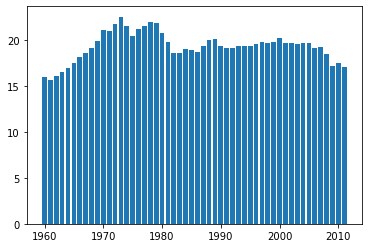

In [12]:
# We can do this, in two lines of code.

# What we'll do is we'll grab the years and then CO2 emissions separately and then we'll send those to a bar chart.

# get the years 

years = stage['Year'].values      # pandas.DataFrame.values is used to return a Numpy representation of the DataFrame.

# get the values

co2 = stage['Value'].values

co2

# create a bar chart

plt.bar(years, co2)

plt.show

**We can see a rise in CO2 emissions per capita from 1960 to 1970. And that's remained fairly steady since.**

**The plot isn't perfect, we don't have a y-axis label, which is really  important. But, that's okay if we're just trying to explore the data.**


**Turns out CO2 emissions per capita have dropped a bit over time. But, we want to make this graphic a bit more appealing before we continue to explore it.**

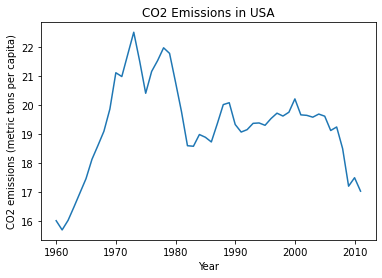

In [13]:
# We want to switch to a line plot

plt.plot(stage['Year'].values, stage['Value'].values)

# We would like to label the axes

plt.xlabel('Year')

plt.ylabel(stage['IndicatorName'].iloc[0])


# We want to label the figure

plt.title('CO2 Emissions in USA')


# to make more honest, we want to start they y-axis at 0

#plt.axis([1959, 2011, 0, 25])


plt.show()

**We notice that the y-axis is actually starting at 15, and that could be misleading.**

**So we want to fix that by making a call to axis and passing the ranges we want to plotted.**

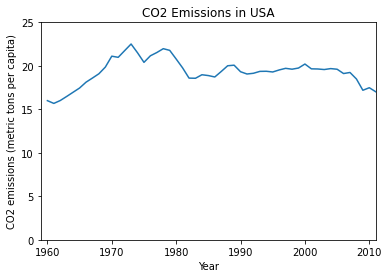

In [14]:
# We want to switch to a line plot

plt.plot(stage['Year'].values, stage['Value'].values)

# We would like to label the axes

plt.xlabel('Year')

plt.ylabel(stage['IndicatorName'].iloc[0])


# We want to label the figure

plt.title('CO2 Emissions in USA')



# to make more honest, we want to start they y-axis at 0

plt.axis([1959, 2011, 0, 25])


plt.show()

**The plot now is arguably better than the original bar chart.
And it certainly stands alone better. Because of the proper labeling of the y-axis.**

## Using Histograms to explore the distribution of values

**We could visualize this data as a histogram to better explore the ranges of values in CO2 production per year.**

In [15]:
# We put some code in here, which would let us explore the values within one standard deviation

# Sometimes it's helpful with histograms to avoid the data getting too spread out because of outliers.

#If we want to just include those within one standard deviation for the mean, we could do the following



#lower = stage['Value'].mean() - stage['Value'].std()

#upper = stage['Value'].mean() + stage['Value'].std()

#hist_data = [x for x in stage[ : 10000]['Value'] if x > lower and x < upper]



# Otherwise, let's look at all the data

# We want to get the hist data point to all the CO2 emissions per capita values in our current data set.

hist_data = stage['Value'].values


hist_data

array([15.99977916, 15.68125552, 16.0139375 , 16.48276215, 16.96811858,
       17.45172525, 18.12107301, 18.59831788, 19.08938916, 19.85794566,
       21.11125227, 20.98020348, 21.74864198, 22.51058213, 21.50293038,
       20.40222407, 21.15761537, 21.53248401, 21.97300469, 21.78043698,
       20.78648774, 19.76676417, 18.59049523, 18.57154371, 18.97675027,
       18.88231274, 18.72072272, 19.35033442, 20.01041341, 20.07576978,
       19.32336817, 19.06223666, 19.14555576, 19.36346258, 19.37655644,
       19.29565986, 19.52789051, 19.71427574, 19.6151546 , 19.74781478,
       20.20761476, 19.65619321, 19.63919577, 19.57623905, 19.68358135,
       19.61027504, 19.11613882, 19.23746045, 18.48923375, 17.1923791 ,
       17.48479218, 17.02021634])

In [16]:
len(hist_data)

52

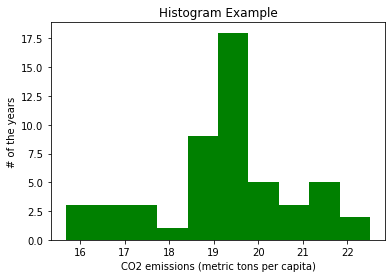

In [17]:
# We want to plot those 52 elements using plot.hist method, which is the call to create a histogram

# the histogram of the data


# We are passing tht method .hist(),  the ndarray (hist_data), then 10 for the number of bins.

# Then we are setting  the density to be false. To make sure it doesn't scale the data.

# And then, we are setting the color to be green. 

# Then, we'll label the axes and label the plot



plt.hist(hist_data, 10, density = False, facecolor = 'green')


plt.xlabel(stage['IndicatorName'].iloc[0])

plt.ylabel('# of the years')

plt.title('Histogram Example')



#plt.grid(True)


plt.show()

**What we get back is a histogram binning CO2 emissions per capita for the US.**

**This is really telling us that most years fall between 18.5 and 20, with some outliers.**

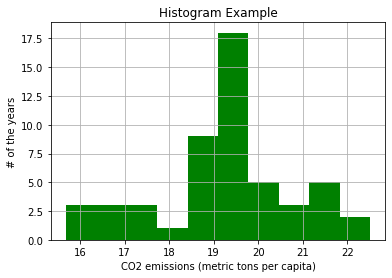

In [18]:
# Now we find it hard to read, so we will add  the grids. 

plt.hist(hist_data, 10, density = False, facecolor = 'green')


plt.xlabel(stage['IndicatorName'].iloc[0])

plt.ylabel('# of the years')

plt.title('Histogram Example')


plt.grid(True)


plt.show()

**So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.**


## How do the USA's numbers relate to those of other countries?

In [19]:
# It's easier for us get the counts for the number of years. Given that we usually fall 19 and 20 metric tons per capita.

# We are curious how the US stacks up, relative to other countries. 

# SO we want to pick a recent year, where we have data for the US, 2011.

# We want to selct CO2 emissions for all countries in 2011

# We'll ask for the data where the indicator is CO2 emissions per capita, and the year is 2011.

# That should give us all the countries that gave us data over that time window.



hist_indicator = 'CO2 emissions \(metric'

hist_year = 2011


mask1 = data['IndicatorName'].str.contains(hist_indicator)

mask2 = data['Year'].isin([hist_year])


# apply our mask

co2_2011 = data[mask1 & mask2]


co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


**We have different countries and their CO2 emissions per capita in 2011.**

**We know, just looking at these values 4.7,  6.9,  5.8,  5.3. We are already suspecting the US might produce more CO2 emissions per person than other countries.**


**for how many countries do we have CO2  per capita emissions data in 2011.**

In [20]:
# How many countries do we have here?

len(co2_2011)

232

**We've got 232. And that would include the US because we didn't do anything special to exclude the US.**

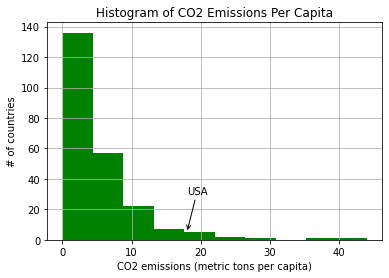

In [23]:
# We want to plot a histogram of the emissions per capita by country.

# subplots returns a touple with the figure , axis attributes

# # Calling plt.subplots method gives us back the figure and the axis separately.


fig, ax = plt.subplots()


ax.annotate('USA',
             xy = (18, 5), xycoords = 'data',
             xytext = (18, 30), textcoords = 'data', 
              arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'), )


# We're setting up basically the same histogram as our last one.
# Except this time, we're counting the number of countries with a 
# certain amount of emissions per person rather than a number of years.



plt.hist(co2_2011['Value'], 10, density = False, facecolor = 'green')


plt.xlabel(stage['IndicatorName'].iloc[0])

plt.ylabel('# of countries')

plt.title('Histogram of CO2 Emissions Per Capita')


#plt.axis([10, 22, 0, 14])


plt.grid(True)


plt.show()

**It looks like the vast majority of countries have CO2 emissions in the range of zero to 10 metric tons per capita.**

**The US, at around 17, in 2011, is actually a real outlier.**

**But where'd that nice label of the USA come from?**

**Matplotlib supports doing more complex things. Like, adding annotations or lines to charts.**

**If we go back to the code, we'll notice that we added an annotation to the string USA.**

**We placed it at the coordinates 18, 30.  And then drew a line from corners 18, 30 to 18, 5.**

**We know, there are more parameters to the annotate method if we wish to read the documentation more.**

**We want to point out that we can do more advanced graphics with Matplotlib.**

**An interesting next step, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!**

# Matplotlib: Baisc Plotting, Bart 2

### Relationship between GDP and CO2 Emissions in USA

In [30]:
# select GDP Per capita emissions for the United States

# We want to set up some more masks to pull out the GDP per capita for the U.S.A., over time.


hist_indicator = 'GDP per capita \(constant 2005'

hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 

mask2 = data['CountryCode'].str.contains(hist_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time

gdp_stage = data[mask1 & mask2]

# plot gdp_stage vs stage


In [31]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


**Per year, we have the GDP per capita, based in the value of U.S. dollars in 2005.**

In [32]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


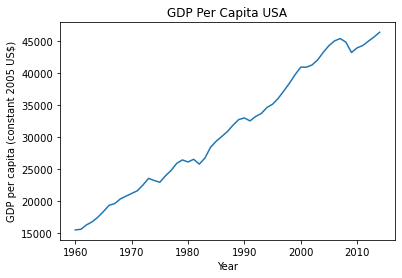

In [33]:
# switch to a line plot

plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)


#label the axes

plt.xlabel('Year')

plt.ylabel(gdp_stage['IndicatorName'].iloc[0])


#label the figure

plt.title('GDP Per Capita USA')


# to make more honest, start y axis at 0

#plt.axis(1959, 2011, 0, 25)


plt.show()

**For the most part, we're seeing solid growth, over time. There are a couple dips here and there, and one, noticeable dip
in the recession around 2008. But the upper trend, is restored by 2010.**

**So, knowing that CO2 emissions over that same time period didn't behave the same way, leads us to think that they aren't closely related.**

**But,  we want to look at a scatter plot to see.**

## Scatter Plot for comaring GDP against CO2 emissions (per capita)

### First, we'll need to make sure we're looking at the same time frames by calling min and max in these columns.

In [34]:
# The reason we wanna make sure these are the same, is that scatter plots require the same number of years in the data set.

print('GDP Min Year = ', gdp_stage['Year'].min(), 'max: ', gdp_stage['Year'].max())

print('CO2 Min Year = ', stage['Year'].min(), 'max: ', stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


**We have 3 extra years of GDP data, so let's trim those off so the scatter plot has equal length arrays to compare (this is actually required by scatter plot)**

In [37]:
# To do trimming, we'll just ask for, the years before 2012


gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]


# Then we'll check that our data has the same number of values for both the GDP and the CO2 emissions.


print(len(gdp_stage_trunc))

print(len(stage))

52
52


**We have 52 years of data for both.**

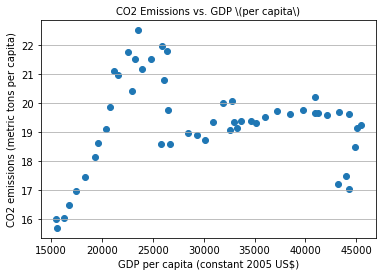

In [40]:
# to make a scatter plot, we'll first call out the fig and axis


%matplotlib inline

import matplotlib.pyplot as plt


fig, axis = plt.subplots()

# Grid lines, Xticks, Xlabel, Ylabel

# Most the rest should be fairly recognizable except for the calls and method scatter.

# To create a scatter plot with these two arrays.

axis.yaxis.grid(True)

axis.set_title('CO2 Emissions vs. GDP \(per capita\)', fontsize = 10)

axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize = 10)

axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize = 10)


X = gdp_stage_trunc['Value']

Y = stage['Value']


axis.scatter(X, Y)

plt.show()

**what we get back is a pretty weak relationship.
It looks like when, GDP and CO2 emissions were climbing in the 60's
they track together. But after that there doesn't seem to be much of a relationship at all. 
We can test this by looking at correlation**

In [41]:
# we'll use the correlation coefficient function in numpy to get back the relationship between these two arrays.


np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

**The main diagonal is each against itself. So we expect to see 1.0 there or perfect correlation.
But on the other diagonal, we see 0.077. That's a really weak correlation between these two indicators.**